## **Analísis de resultados**

En este examen se estudia la propagacion de ondas electromagneticas empleando el método de diferencias finitas en el dominio del tiempo (FDTD).una onda electromagnética linealmente polarizada propagándose en el vacío en dirección z, estas ecuaciones se reducen a un par de ecuaciones acopladas que describen la evolución temporal del campo eléctrico $E_x$ y del campo magnético $H_y$

$$
\frac{\partial E_x}{\partial t} = -\frac{1}{\varepsilon_0} \frac{\partial H_y}{\partial z}$$

$$\frac{\partial H_y}{\partial t} = -\frac{1}{\mu_0} \frac{\partial E_x}{\partial z}$$
donde $\epsilon_o$ y $\mu_o$ representan la permitividad eléctrica y permeabilidad magnética del vacío, respectivamente.

La importancia de este método radica en su discretización escalonada tanto en el espacio como en el tiempo: los campos eléctricos se calculan en puntos enteros de espacio y tiempos semi-enteros, mientras que los campos magnéticos se evalúan en puntos semi-enteros de espacio y tiempos enteros. Este escalonamiento natural acopla las derivadas espaciales y temporales mediante diferencias centradas, minimizando los errores numéricos y garantizando una alta precisión. El algoritmo resultante es explícito y condiciónamente estable, sujeto a la condición de estabilidad de Courant-Friedrichs-Lewy (CFL):

$$\beta = \frac{c \Delta t}{\Delta z} \leq \frac{1}{2}$$

### **Analísis condiciones de Frontera**


Se plantean dos tipos de condiciones de frontera (CF) para analizar el comportamiendo de la propagacion de las ondas en las siguientes situaciones:

- Condiciones Periódicas: Simulan un dominio infinito donde la onda que sale por un extremo entra por el opuesto, ideal para estudiar propagación en el espacio libre de una onda.

- Condiciones Dirichet: Modelan paredes conductoras perfectas donde los campos tangenciales se anulan, esencial para simular cavidades resonantes o estructuras confinadas. Se espera obtener una onda estacionaria con dichas condiciones.



In [2]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image as mpimg
import numpy as np
import os
import glob
from matplotlib.animation import FuncAnimation

Para comprobar que la simulación esté funcionando correctamente se evoluciona el sistema con los parametros:

beta =0.05 \
dz= 2.0202 \
dt=  0.10101



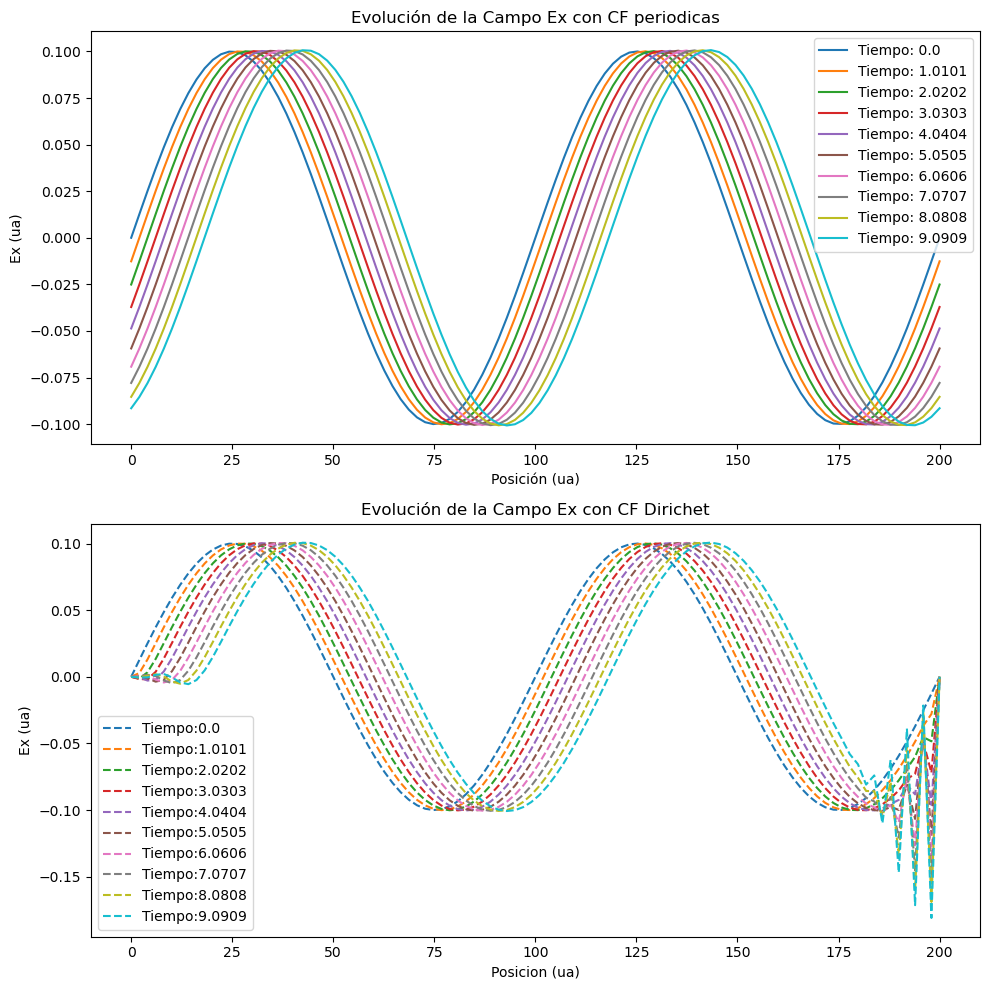

In [3]:
#Preoparación de los dataframes
data_periodic = pd.read_csv('data/EM_periodic.txt', sep=';', index_col=False)
data_periodic.columns = ["t",'z', 'Ex', 'Hy']

data_fixed = pd.read_csv('data/EM_fixed.txt', sep=';', index_col=False)
data_fixed.columns = ["t",'z', 'Ex', 'Hy']


#Parametros
beta =0.05
dz= 2.0202
dt=  0.10101


fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10, 10))
for i in range(0, 100, 10):
    if i% 10 == 0:
    
        ex_filtrado_periodic = data_periodic.loc[data_periodic['t'] == i, 'Ex']
        ex_filtrado_fixed = data_fixed.loc[data_periodic['t'] == i, 'Ex']
        z_filtrado = data_periodic.loc[data_periodic['t'] == i, 'z']

        ax1.plot(z_filtrado,ex_filtrado_periodic, label='Tiempo: ' + str(i*dt), linestyle='-')
        ax2.plot(z_filtrado, ex_filtrado_fixed, label='Tiempo:'+ str(i*dt), linestyle='--')
        ax1.set_title(f'Evolución de la Campo Ex con CF periodicas')
        ax2.set_title(f'Evolución de la Campo Ex con CF Dirichet')
        ax1.set_xlabel('Posición (ua)')
        ax1.set_ylabel('Ex (ua)')
        ax1.grid()
        ax1.legend()
        ax2.set_xlabel('Posicion (ua)')
        ax2.set_ylabel('Ex (ua)')
        ax2.grid()
        ax2.legend()
    

plt.tight_layout()    
plt.show() 
plt.close()

En la gráfica anterior se observa, de manera simultánea, la evolución temporal del campo eléctrico para una onda con condiciones de frontera periódicas y de Dirichlet. Allí se muestran los primeros instantes de la evolución, en los cuales se aprecia cómo la onda sometida a condiciones de Dirichlet comienza a presentar una perturbación adicional del campo eléctrico en los extremos. Para una mejor visualización, se incluye una animación que ilustra la evolución temporal de los campos eléctrico y magnético bajo las distintas condiciones de frontera. Dicha animación se encuentra en la ./animations/onda_electromagnetica_completa.gif

Animación guardada como 'animations/onda_electromagnetica_completa.gif'


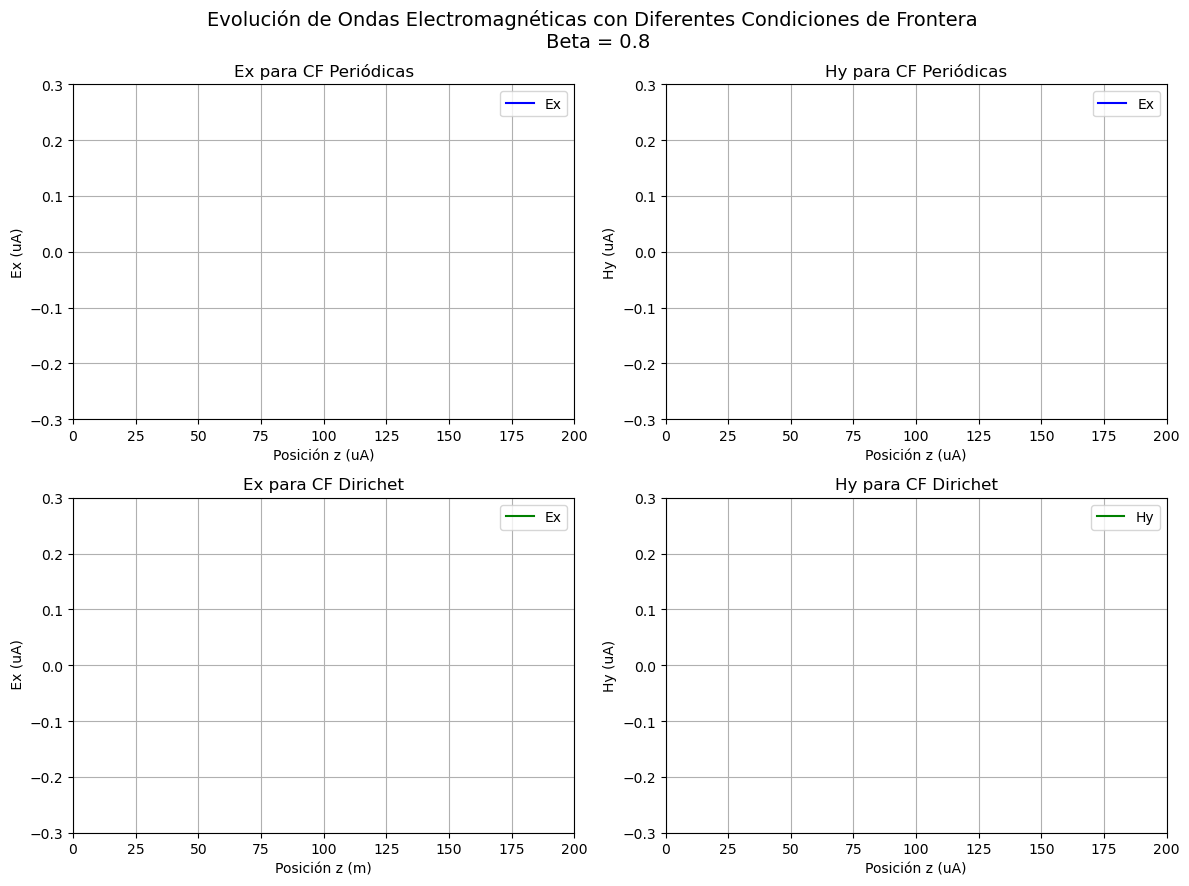

In [31]:


# Crear directorio para las animaciones si no existe
os.makedirs('animations', exist_ok=True)

# Lista para almacenar todos los datos
all_ex_periodic = []
all_ex_fixed = []
all_hy_periodic = []
all_hy_fixed = []
steps = []
z_values = []

# Cargar todos los datos
for i in range(0, 1001, 10):
    ex_filtrado_periodic = data_periodic.loc[data_periodic['t'] == i, 'Ex']
    ex_filtrado_fixed = data_fixed.loc[data_periodic['t'] == i, 'Ex']
    hy_filtrado_periodic = data_periodic.loc[data_periodic['t'] == i, 'Hy']
    hy_filtrado_fixed = data_fixed.loc[data_periodic['t'] == i, 'Hy']
    z_filtrado = data_periodic.loc[data_periodic['t'] == i, 'z']

    all_ex_periodic.append(ex_filtrado_periodic.values)
    all_ex_fixed.append(ex_filtrado_fixed.values)
    all_hy_periodic.append(hy_filtrado_periodic.values)
    all_hy_fixed.append(hy_filtrado_fixed.values)
    z_values.append(z_filtrado.values)
    steps.append(i)


    

# Crear la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle(f'Evolución de Ondas Electromagnéticas con Diferentes Condiciones de Frontera \n Beta = {beta}', fontsize=14)

# Inicializar líneas vacías
line_periodic_ex, = axs[0, 0].plot([], [], 'b-', label='Ex')
line_periodic_hy, = axs[0, 1].plot([], [], 'b-', label='Ex')


# Para los subplots inferiores, mostraremos la diferencia entre condiciones
line_fixed_ex, = axs[1, 0].plot([], [], 'g-', label='Ex')
line_fixed_hy, = axs[1, 1].plot([], [], 'g-', label='Hy')

# Configurar ejes
axs[0, 0].set_xlim(0, 200)
axs[0, 0].set_ylim(-0.3, 0.3)
axs[0, 0].set_title('Ex para CF Periódicas')
axs[0, 0].set_xlabel('Posición z (uA)')
axs[0, 0].set_ylabel('Ex (uA)')
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].set_xlim(0, 200)
axs[0, 1].set_ylim(-0.3, 0.3)
axs[0, 1].set_title('Hy para CF Periódicas')
axs[0, 1].set_xlabel('Posición z (uA)')
axs[0, 1].set_ylabel('Hy (uA)')
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].set_xlim(0, 200)#
axs[1, 0].set_ylim(-0.3, 0.3)
axs[1, 0].set_title('Ex para CF Dirichet')
axs[1, 0].set_xlabel('Posición z (m)')
axs[1, 0].set_ylabel(' Ex (uA)')
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].set_xlim(0, 200)
axs[1, 1].set_ylim(-0.3, 0.3)
axs[1, 1].set_title('Hy para CF Dirichet')
axs[1, 1].set_xlabel('Posición z (uA)')
axs[1, 1].set_ylabel('Hy (uA)')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Texto para mostrar el paso actual
step_text = fig.text(0.5, 0.02, '', ha='center', fontsize=12)

# Función de inicialización
def init():
    line_periodic_ex.set_data([], [])
    line_periodic_hy.set_data([], [])
    line_fixed_ex.set_data([], [])
    line_fixed_hy.set_data([], [])
    step_text.set_text('')
    return line_periodic_ex, line_periodic_hy, line_fixed_ex, line_fixed_hy, step_text

# Función de animación
def animate(frame):
    z = z_values[frame]
    line_periodic_ex.set_data(z, all_ex_periodic[frame])
    line_periodic_hy.set_data(z, all_hy_periodic[frame])
    line_fixed_ex.set_data(z, all_ex_fixed[frame])
    line_fixed_hy.set_data(z, all_hy_fixed[frame])
    step_text.set_text(f'Paso: {steps[frame]}')
    return line_periodic_ex, line_periodic_hy, line_fixed_ex, line_fixed_hy, step_text

# Crear animación
ani = FuncAnimation(fig, animate, frames=len(steps),
                    init_func=init, blit=True, interval=100)

# Guardar animación como GIF
ani.save('animations/onda_electromagnetica_completa.gif', writer='pillow', fps=10, dpi=100)

print("Animación guardada como 'animations/onda_electromagnetica_completa.gif'")

# Mostrar animación
plt.tight_layout()
#plt.subplots_adjust(bottom=0.1) # 
plt.show()

De la animación se puede apreciar cómo la onda electromagnética, cuyos extremos están fijos, da lugar a una onda estacionaria. Esto ocurre porque las condiciones de frontera de Dirichlet obligan a que el campo eléctrico se anule en los extremos, lo que genera la superposición de la onda incidente con la onda reflejada. La interferencia de ambas produce nodos y antinodos característicos, dando origen al patrón de onda estacionaria. Otro aspecto importante a a mencionar, es el hecho de que los campos eléctricos y magnéticos está en fase, por esta razón se observa como su evolución en el tiempo es identica para ambos casos.

### **Analísis de la estabilidad numérica**


Para analizar la estabilidad de la simulación con distintos valores de ∆z y ∆t, se centrará la atención en el parámetro Beta, cuya definición depende de los espaciados temporal y espacial. Con este fin, se compararán los valores del campo eléctrico en el último instante temporal para diferentes valores de Beta.

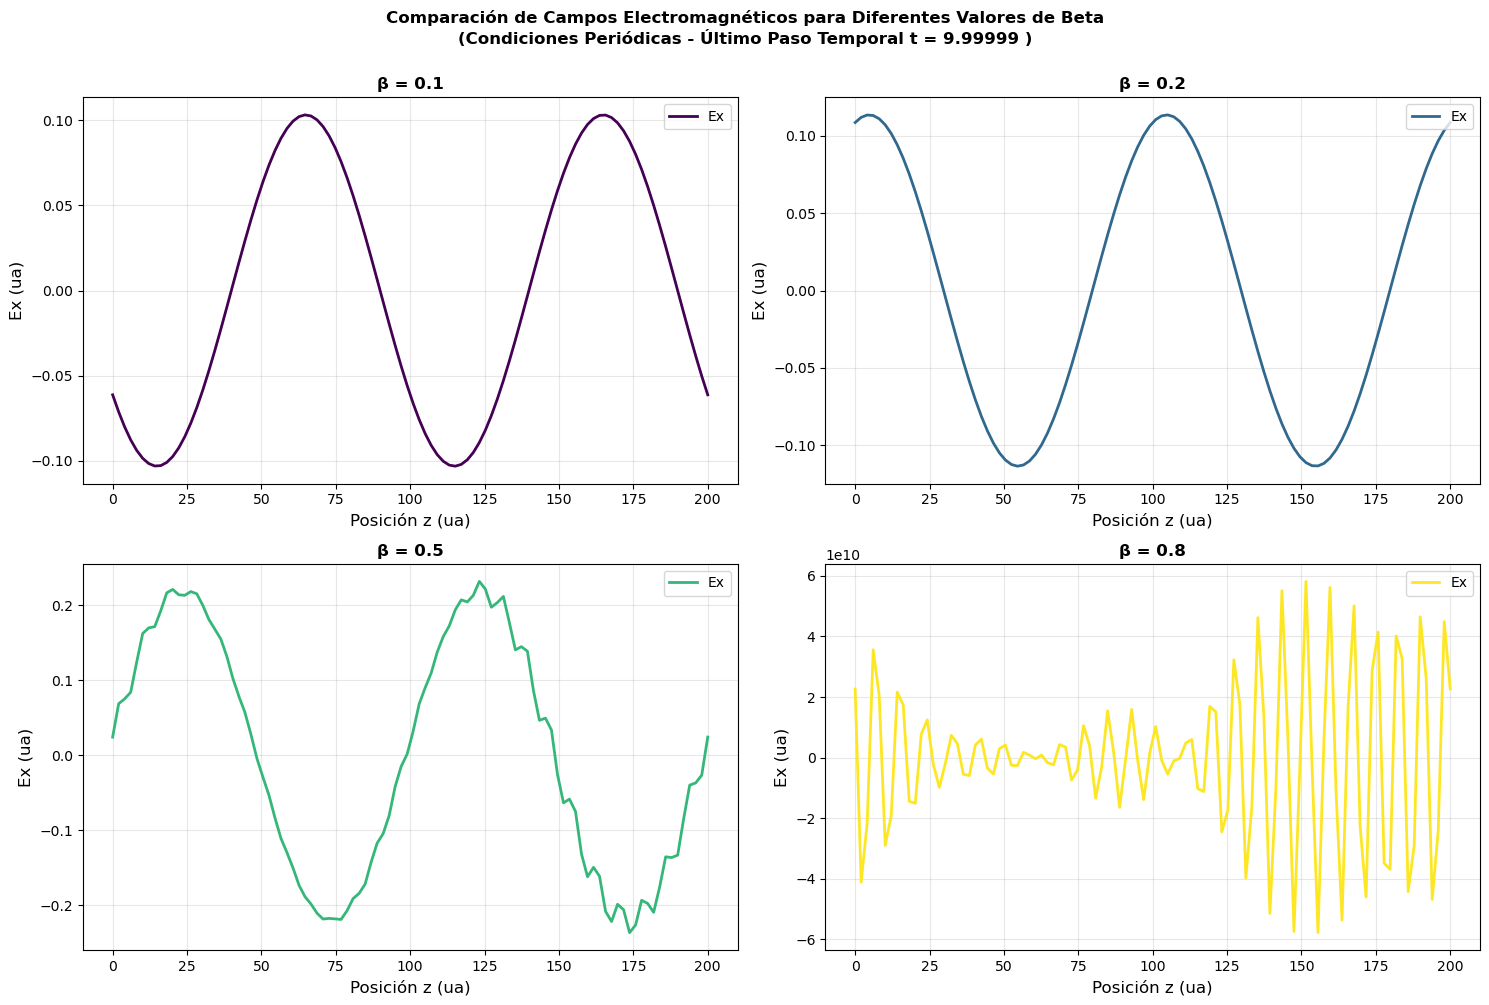

In [43]:
# Configuración de estilo
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10

# Lista de valores beta probados
beta_values = [0.1, 0.2, 0.5, 0.8] #, 0.5, 0.6, 0.7, 1.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(beta_values)))

# Crear figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Comparación de Campos Electromagnéticos para Diferentes Valores de Beta\n(Condiciones Periódicas - Último Paso Temporal t = {99*dt} )', 
             fontsize=12, fontweight='bold', y=1)

# Aplanar el array de axes para facilitar el acceso
axs = axs.flatten()

# Crear gráficos para cada beta
for i, beta in enumerate(beta_values):
    # Construir nombre de archivo
    beta_int = int(beta * 100)
    filename = f"data/EM_periodic_beta_{beta_int}.txt"
    
    
    # Leer datos (asumiendo formato: z, Ex, Hy)
    data = pd.read_csv(filename, sep=';', index_col=False)
    data.columns= ["t", 'z', 'Ex', 'Hy']
    

    dataEx = data.loc[data['t'] == 99, 'Ex']
    dataHy = data.loc[data['t'] == 99, 'Hy']
    z = data.loc[data['t'] == 99, 'z']
    
    
    # Graficar campos Ex
    axs[i].plot(z, dataEx, color=colors[i], linewidth=2, label='Ex')
    
    
    # Configurar subplot
    axs[i].set_title(f'β = {beta}', fontsize=12, fontweight='bold')
    axs[i].set_xlabel('Posición z (ua)', fontsize=12)
    axs[i].set_ylabel('Ex (ua)', fontsize=12)
    axs[i].grid(True, alpha=0.3)
    axs[i].legend(loc='upper right')
        

# Ajustar layout
plt.tight_layout()
plt.show()

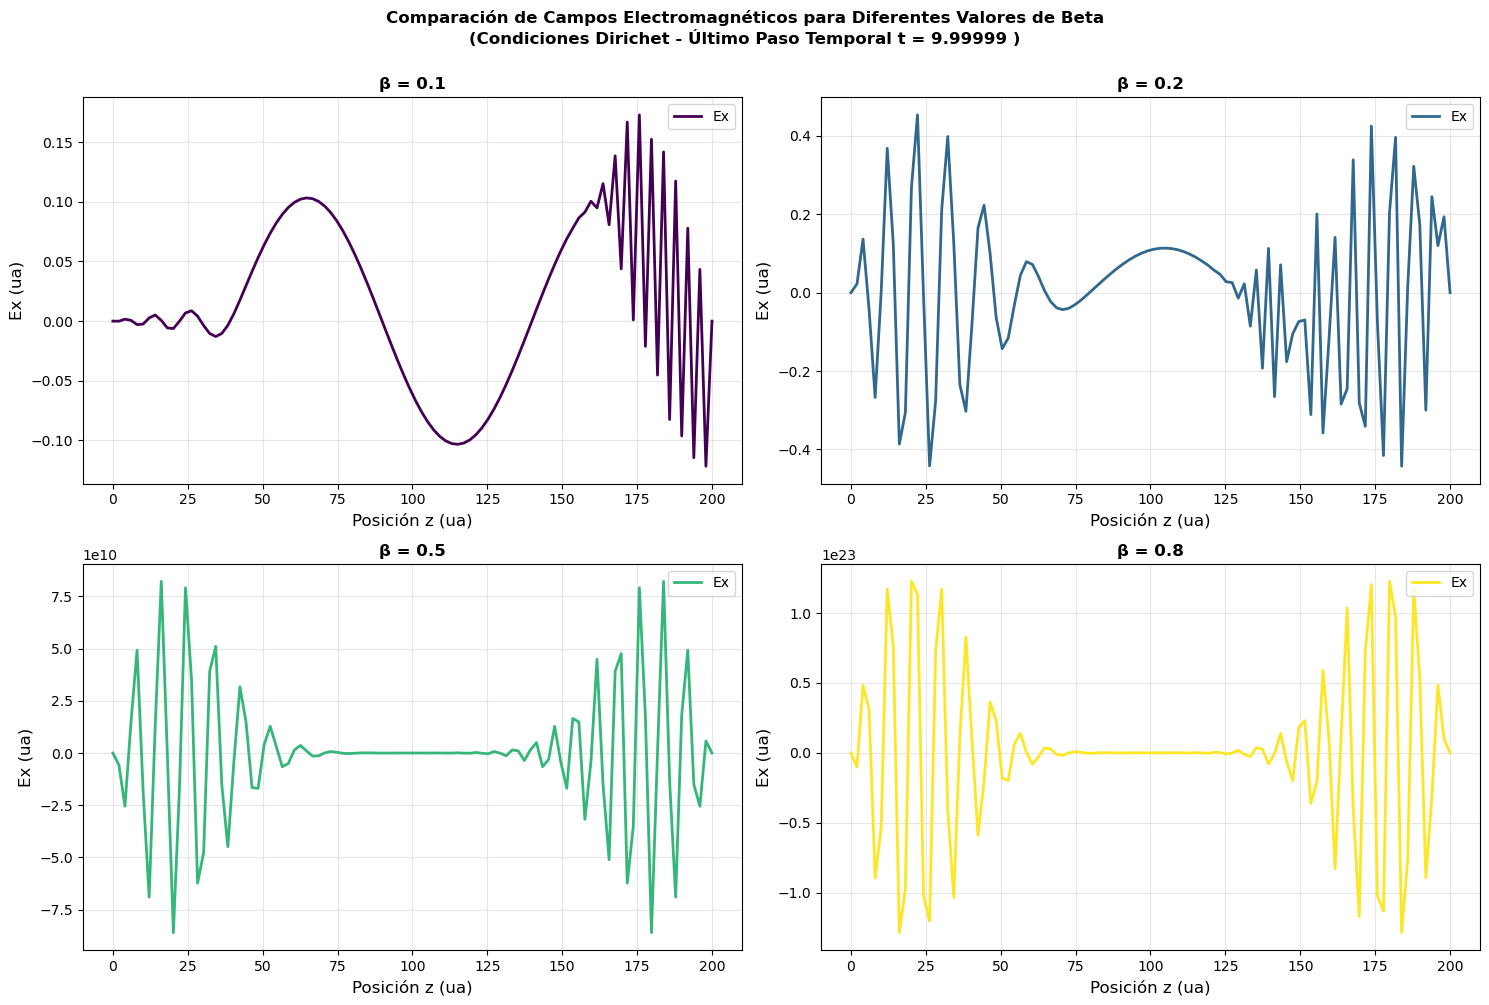

In [41]:
# Configuración de estilo
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10

# Lista de valores beta probados
beta_values = [0.1, 0.2, 0.5, 0.8] #, 0.5, 0.6, 0.7, 1.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(beta_values)))

# Crear figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Comparación de Campos Electromagnéticos para Diferentes Valores de Beta\n(Condiciones Dirichet - Último Paso Temporal t = {99*dt} )', 
             fontsize=12, fontweight='bold', y=1)

# Aplanar el array de axes para facilitar el acceso
axs = axs.flatten()

# Crear gráficos para cada beta
for i, beta in enumerate(beta_values):
    # Construir nombre de archivo
    beta_int = int(beta * 100)
    filename = f"data/EM_fixed_beta_{beta_int}.txt"
    
    
    # Leer datos (asumiendo formato: z, Ex, Hy)
    data = pd.read_csv(filename, sep=';', index_col=False)
    data.columns= ["t", 'z', 'Ex', 'Hy']
    

    dataEx = data.loc[data['t'] == 99, 'Ex']
    dataHy = data.loc[data['t'] == 99, 'Hy']
    z = data.loc[data['t'] == 99, 'z']
    
    
    # Graficar campos Ex
    axs[i].plot(z, dataEx, color=colors[i], linewidth=2, label='Ex')
    
    
    # Configurar subplot
    axs[i].set_title(f'β = {beta}', fontsize=12, fontweight='bold')
    axs[i].set_xlabel('Posición z (ua)', fontsize=12)
    axs[i].set_ylabel('Ex (ua)', fontsize=12)
    axs[i].grid(True, alpha=0.3)
    axs[i].legend(loc='upper right')
        


# Ajustar layout
plt.tight_layout()
plt.show()

De las anteriores gráficas se puede observar lo siguiente:

1. Para la onda electromagnética con CF periodicas, la simulación presenta estabilidad númerica para valores de beta que cumplan la condición de Counter. Justo en el valor critico de $\beta = 0.5$ comienza a presentar inestabilidad.

2.  Para la onda electromagnética con CF Dirichet, la simulación presenta mayor inestabilidad incluso para valores que cumplen con la condición de Counter. Esto se puede deber a que no se hizo un control del espaciado espacial y las condiciones que este debe cumplir.